# Task 3 of sheet 4
Numerical Methods 2, WS 2021/22<br>
by Clemens Wager

(2 Points) Consider the webpage linking graph corresponding to the links

A -> B; D; E<br>
B -> A;C<br>
C -> A; B<br>
D -> B<br>
E -> A;C

Calculate the PageRank in a little program/script with power iteration where you use<br>
(i) p = 0.15 and <br>
(ii) p = 1e-03.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create a linking matrix A 5x5, where rows=sink and cols=source
# this matrix essentially is a probability matrix
A = [
    [  0 , .5 , .5, 0 , .5 ],
    [ 1/3, 0  , .5, 1.,  0 ],
    [  0 , .5 , 0 , 0 , .5 ],
    [ 1/3, 0  , 0 , 0 ,  0 ],
    [ 1/3, 0  , 0 , 0 ,  0 ]]
A = np.array(A)
n = len(A)
print(f"linking matrix A of dimension {n}x{n}\n")
dfmat = pd.DataFrame(data=A, columns=['A','B','C','D','E'], index=['A','B','C','D','E'])
print(round(dfmat,1))

linking matrix A of dimension 5x5

     A    B    C    D    E
A  0.0  0.5  0.5  0.0  0.5
B  0.3  0.0  0.5  1.0  0.0
C  0.0  0.5  0.0  0.0  0.5
D  0.3  0.0  0.0  0.0  0.0
E  0.3  0.0  0.0  0.0  0.0


In [3]:
# create a rank vector v with initial entries
# Multiplying this vector v with the linking matrix A means, 
# that it collects the importance each webpage gets from all other webpages.
v = np.ones(n)/n
print(f"Initial rank vector\nv = {v}")

# Probabilitiy to leave the circle of n webpages
p1 = 0.15
p2 = 0.001
print(f"p1 = {p1}\np2 = {p2}")

Initial rank vector
v = [0.2 0.2 0.2 0.2 0.2]
p1 = 0.15
p2 = 0.001


In [4]:
# Define pagerank function

def pagerank(A, v, p, kmax):
    """ Page rank algorithm """
    X = [] # matrix holding the rank vectors in its rows
    
    M = (1-p)*A + p*np.ones(n)/n    # Define Random Surfer Model for p
    #M = (1-p)*A + p* np.full((n,n),1/n)
    dfM = pd.DataFrame(data=M, columns=['A','B','C','D','E'], index=['A','B','C','D','E']) # nice output
    print(f"let p={p}, M =\n{round(dfM,3)}\n")
    
    X.append(np.around(v,6))
    k = 0  # iteration count
    while k < kmax:
        v = M @ v
        k += 1
        X.append(np.around(v,6))
    print(f"Number of iterations: {k}\nSolution found: {np.around(v,4)}")
    plt.plot(X)
    plt.show(X)

let p=0.15, M =
       A      B      C     D      E
A  0.030  0.455  0.455  0.03  0.455
B  0.313  0.030  0.455  0.88  0.030
C  0.030  0.455  0.030  0.03  0.455
D  0.313  0.030  0.030  0.03  0.030
E  0.313  0.030  0.030  0.03  0.030

Number of iterations: 8
Solution found: [0.2862 0.2907 0.2009 0.1111 0.1111]


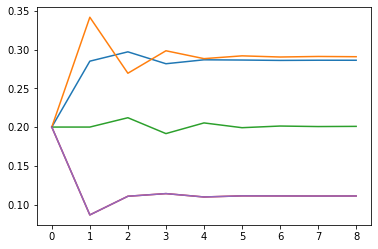

In [5]:
# Case p1
kmax = 8
pagerank(A, v, p1, kmax)
# solution for p1=0.15 => [0.2862 0.2907 0.2009 0.1111 0.1111]

let p=0.001, M =
       A    B    C      D    E
A  0.000  0.5  0.5  0.000  0.5
B  0.333  0.0  0.5  0.999  0.0
C  0.000  0.5  0.0  0.000  0.5
D  0.333  0.0  0.0  0.000  0.0
E  0.333  0.0  0.0  0.000  0.0

Number of iterations: 8
Solution found: [0.2999 0.2995 0.2003 0.1001 0.1001]


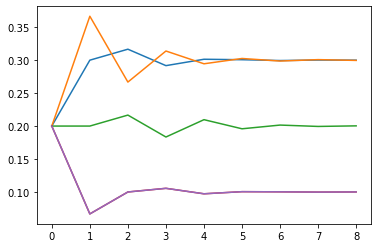

In [6]:
# Case p2
kmax = 8
pagerank(A, v, p2, kmax)
# solution for p1=0.001 => [0.2999 0.2995 0.2003 0.1001 0.1001]